In [ ]:
import csv
import pandas as pd
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
path = "/content/drive/MyDrive/CJ 미래기술 첼린지/2021년 미래기술 챌린지/2. 택배 배송 데이터/2-1. 택배 배송 데이터.xlsx"

pickle_path = "/content/drive/MyDrive/CJ 미래기술 첼린지/2021년 미래기술 챌린지/2. 택배 배송 데이터/lmd_2_1.pkl"

In [ ]:
# data = pd.read_excel(path)

In [ ]:
# 택배 배송 데이터 한번 read 시간 = 48초
# data.to_pickle("lmd_2_1.pkl")

In [ ]:
data = pd.read_pickle(pickle_path)

In [ ]:
data.columns

Index(['Unnamed: 0', '구분명', '집화일자', '집배일자', '운임명', '수량(BOX)', '운임', '집화여부',
       '집배시간', '배달일자', '장비구분', '품목', 'SM명', '받는분주소'],
      dtype='object')

In [ ]:
# LMD 배송 과제 제공 데이터는 27개의 컬럼 != 해당 데이터의 칼럼은 14개

# 구분 : (배달/집하) 중 배달의 데이터만 존재
# 일자 : 집화일자, 집배일자 존재
# 운임명 : 운임구분(선불/신용/착불) 3개의 데이터 유형 존재
# 수량(BOX) : 박스 수량 => 1개 혹은 2개 만 존재
# 운임 : 운임비용 => 5000, 3500, 2500, 6000 => 4개의 운임비용 존재
# 집화여부
# 집배시간 : LMD 배송 과제 제공 데이터에서 "최종처리시간"의 열과 동일해 보임(따로 집배시간에 대한 설명없음) => 집배시간과 운임비용간의 상관관계 조사 필요
# 배달일자 : (배달/집하) 완료 일자 : 여기서는 아마 배달 완료 시간인것 같음
# 장비구분 : (화변/스마트폰) 장비 유형 구분 => 여기서 말하는 화면과 스마트폰이 어떤것을 의미하는지 불확실함 -> 화면/스마트폰/스캐너 3개의 유형이 존재함
# 품목 : 배송상품 품목 분류 => 해당 데이터는 식품에 대한 데이터만 존재
# SM명 : 택배기사 성명 => 하지만 해당 데이터는 정수값으로 존재
# 받는분주소

# 운송장번호, 주문번호, 보내는분, 보내는분주소, 받는분, 단품명, 최종상태, 인수자, 발송고객번호, 발송고객명, 정산고객번호, 정산고객명, 서명이미지(여부), 위탁이미지(여부) 데이터는 존재X
# len(data.columns)

In [ ]:
data.loc[:5]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
0,0,배달,2021-03-02,2021-03-03,신용,1,5000,Y,190148,2021-03-03,스마트폰,식품,57,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소
1,1,배달,2021-03-02,2021-03-03,선불,1,3500,Y,190149,2021-03-03,스마트폰,식품,57,경기도 화성시 장안면 버들로
2,2,배달,2021-03-01,2021-03-02,신용,1,2500,Y,143956,2021-03-02,스마트폰,식품,57,경기도 화성시 장안면 석포리
3,3,배달,2021-03-03,2021-03-04,신용,1,3500,Y,180605,2021-03-04,스마트폰,식품,57,경기도 화성시 장안면 매바위로 347
4,4,배달,2021-03-03,2021-03-04,신용,1,3500,Y,191503,2021-03-04,스마트폰,식품,57,경기도 화성시 장안면 산운내길
5,5,배달,2021-03-03,2021-03-05,신용,1,3500,Y,175052,2021-03-05,스마트폰,식품,57,경기도 화성시 장안면 버들로 1232-4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365450 entries, 0 to 365449
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  365450 non-null  int64         
 1   구분명         365450 non-null  object        
 2   집화일자        365450 non-null  datetime64[ns]
 3   집배일자        365450 non-null  datetime64[ns]
 4   운임명         365450 non-null  object        
 5   수량(BOX)     365450 non-null  int64         
 6   운임          365450 non-null  int64         
 7   집화여부        365450 non-null  object        
 8   집배시간        365450 non-null  int64         
 9   배달일자        365450 non-null  datetime64[ns]
 10  장비구분        365450 non-null  object        
 11  품목          365450 non-null  object        
 12  SM명         365450 non-null  int64         
 13  받는분주소       365302 non-null  object        
dtypes: datetime64[ns](3), int64(5), object(6)
memory usage: 39.0+ MB


In [ ]:
# 받는분 주소는 38개 null 존재

In [ ]:
data["구분명"].unique()

array(['배달'], dtype=object)

In [ ]:
data["운임명"].unique()

array(['신용', '선불', '착불'], dtype=object)

In [ ]:
data["장비구분"].unique()

array(['스마트폰', '화면', '스캐너'], dtype=object)

In [ ]:
data["품목"].unique()

array(['식품'], dtype=object)

In [ ]:
data["SM명"].unique()

array([ 57,  55, 150, 111,  83, 216, 200, 164, 134, 108,   5, 173,  68,
        22, 175,  99, 130, 202, 259, 280,  27, 196,  21,  93,  51, 161,
       281, 199, 158, 100, 246,  37, 269, 241,  85, 116, 247, 140,  38,
       181, 279,  86, 192,  48,  56,  94,  35,  54, 171, 248,  53, 271,
        29, 139, 182, 184, 124, 152,  69, 260,  96, 112, 235, 245, 238,
         0,  47,  42,  75, 141,   1, 128, 217,   2,  81,  44, 137, 251,
         6, 273, 189, 263, 117,  84,  45, 242, 114,  19, 165, 183, 132,
       230,  30, 220, 131,  41, 104, 209, 233,  98, 143,  14, 168, 127,
       272, 195, 136,  31, 257, 101, 159,  66, 203,  58,  90, 204,   3,
        92, 258, 151, 231, 109, 208,  40, 126, 213,  64,  76,  71, 218,
       275, 267, 237, 160,  59, 239, 142,   7, 228, 129,  91, 122,  80,
       119, 234,  49, 102, 219, 229,  12, 191,  43, 147, 146, 205, 123,
       240,  46,   8,  61,  73, 120,  16,  74,  23,  87, 253, 206,  60,
       148, 162, 179,  65,  72,   9, 153,  10,  11,  20, 224, 11

In [ ]:
data["수량(BOX)"].unique()

array([1, 2])

In [ ]:
data["운임"].unique()

array([5000, 3500, 2500, 6000])

In [ ]:
# 해당 데이터의 개수 : 365450 , 받는분 주소의 고유값 개수 : 123792
# => 중복으로 택배를 시킨 사람이 존재함 => 똑같은 운임비용이 측정 되어있는지 확인 필요 

len(data["받는분주소"].unique())

123792

In [ ]:
# 상선은 화물을 운송하는것이 주목적인데, 그목적을 달성하기 위하여 화물을 정해진 장소로 모으는 활동을 집화라고 한다.

data["집화여부"].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
# 집화일자, 배달일자, 받는분 주소, 운임(운임비용), 최종처리시간(집배시간), 수량(Box개수) dataframe 생성

t_columns = ["집화일자", "배달일자", "받는분주소", "운임", "집화여부","집배시간", "수량(BOX)"]

df = data.loc[:, t_columns]
df

,집화일자,배달일자,받는분주소,운임,집화여부,집배시간,수량(BOX)
0,2021-03-02,2021-03-03,경기도 화성시 장안면 매바위로366번길 8 (주)BIT범우연구소,5000,Y,190148,1
1,2021-03-02,2021-03-03,경기도 화성시 장안면 버들로,3500,Y,190149,1
2,2021-03-01,2021-03-02,경기도 화성시 장안면 석포리,2500,Y,143956,1
3,2021-03-03,2021-03-04,경기도 화성시 장안면 매바위로 347,3500,Y,180605,1
4,2021-03-03,2021-03-04,경기도 화성시 장안면 산운내길,3500,Y,191503,1
...,...,...,...,...,...,...,...
365445,2021-03-05,2021-03-06,"경기도 화성시 봉담읍 상봉길 35-10 , 106동 202호 (봉담읍,",5000,Y,175758,1
365446,2021-03-02,2021-03-04,"경기 화성시 봉담읍 상봉길 35-10 (상리,",6000,Y,111253,1
365447,2021-03-02,2021-03-05,"경기도 화성시 봉담읍 상봉길 31 (봉담읍,",3500,Y,174250,1
365448,2021-03-03,2021-03-04,경기 화성시 봉담읍 상봉길 35-10,2500,Y,114959,1


In [ ]:
# "경기도 화성시 봉담읍 상봉길 35-10"의 택배정보를 예로 분석

sample = df[df["받는분주소"] == "경기도 화성시 봉담읍 상봉길 35-10"]
sample

,집화일자,배달일자,받는분주소,운임,집화여부,집배시간,수량(BOX)
29929,2021-03-05,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,92059,1
207860,2021-03-02,2021-03-04,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,180446,1
266128,2021-03-05,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,121149,1
266141,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,3500,Y,182248,1
267048,2021-03-02,2021-03-04,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,111806,1
...,...,...,...,...,...,...,...
365419,2021-03-04,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,123054,1
365429,2021-03-05,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,174033,1
365433,2021-03-05,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,110049,1
365444,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,120726,1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
sample = sample.sort_values(by=["집배시간", "운임"])

In [ ]:
#  운임비용과 집배시간간의 상관계수 분석

sample["운임"].corr(sample["집배시간"], method="kendall")

# 운임비용과 집배시간간의 상관계수 => 음의 상관계수(단, 값의 절대값이 크지 않음) => 즉, 집배시간이 길어질수록 운임 비용은 적어진다. => 이게 맞나?, 근데 상식적으로 말이 되지 않음(불행중 다행인것은 절대값이 그리 크지 않다는 점이다.)

-0.09568485552333603

In [ ]:
# row : 29929, 364046 번 데이터를 봤을때 
# 한눈에 봐도 같은 주소임에도, 또한 집배시간차이 미미, 수량, 집화여부차이가 없음에도 운임 비용이 차이가 많이 남
# 다만 차이가 있는 부분은 배달일자가 이틀차이가 남
# "경기도 화성시 봉담읍 상봉길 35-10" 해당 위치는 "봉담 동문 굿모닝힐아파트" => 즉 같은 아파트 내에서 거주하지만 동이 다른 사람들의 집합인듯함
# 두가지 의문이 드는것은 첫번째는 같은 아파트로 묶여 있지만 운임비용이 매우 크게 차이가 난다는 점이다(2500 < 6000) 
# 두번째는 집화일자가 동일 (2021-03-05)하지만 배달일자가 이틀 차이가 남에도 집배시간은 1,899 정도 차이가 남 
# 집배시간에 대한 단위를 알아야 할것 같다 저 저정도의 집배시간이 주는 의미에 대해 생각해 볼 필요가 있음
# 또한 CJ에서 현재 운임 비용이 측정되는 기준에 대한 조사가 필요할 것으로 보임 => 거리 간의 차이가 크지 않았다. 
# 이유: 집화 여부와 운임비용간의 상관관계가 두 데이터만 봤을때 크지 않을것 으로 추측

# 집화일자와 배달일자의 차이가 클수록 운임 비용이 높게 측정됨 => 확인 결과 상관계수가 뚜렷하지 않다.

sample

,집화일자,배달일자,받는분주소,운임,집화여부,집배시간,수량(BOX)
29929,2021-03-05,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,92059,1
364046,2021-03-05,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,6000,Y,93958,1
365218,2021-03-07,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,100013,1
364881,2021-03-04,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,100539,1
364635,2021-03-05,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,6000,Y,102500,1
...,...,...,...,...,...,...,...
365138,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,192301,1
365149,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,3500,Y,192455,1
364204,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,192503,1
267388,2021-03-03,2021-03-05,경기도 화성시 봉담읍 상봉길 35-10,3500,Y,192548,1


In [ ]:
sample["운임"].corr(sample["수량(BOX)"], method="kendall")

nan

In [ ]:
sample["수량(BOX)"].unique()

array([1])

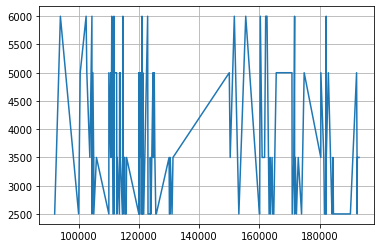

In [ ]:
s = sample.loc[:, ["운임"]]
t = sample.loc[:, ["집배시간"]]

fig, ax = plt.subplots()
ax.plot(t, s)

ax.grid()

plt.show()

In [ ]:
sample["운임"].unique()

array([2500, 6000, 5000, 3500])

In [ ]:
sample["집배시간"].unique()

array([ 92059,  93958, 100013, 100539, 102500, 102736, 103741, 104431,
       104440, 104738, 105005, 105043, 105048, 105930, 110049, 110655,
       110852, 111013, 111430, 111748, 111806, 111850, 112523, 112624,
       112706, 112840, 113555, 113636, 113709, 113816, 113820, 114552,
       114619, 114701, 114737, 114827, 114926, 115200, 115316, 115355,
       115818, 115933, 120010, 120045, 120103, 120114, 120148, 120159,
       120202, 120447, 120542, 120726, 120755, 120938, 121044, 121149,
       121316, 121318, 121332, 121349, 121616, 122930, 123054, 123152,
       123826, 123828, 124042, 124708, 124731, 124901, 125117, 125331,
       125641, 125751, 125809, 130053, 130159, 130406, 130417, 130421,
       131035, 131344, 150034, 150339, 151713, 153214, 155500, 160057,
       160117, 160341, 160944, 161019, 161344, 161759, 162122, 162554,
       163259, 163641, 163715, 164245, 164455, 164812, 165629, 170842,
       170926, 171506, 171721, 171725, 171943, 172336, 172936, 174033,
      

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51665 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_te

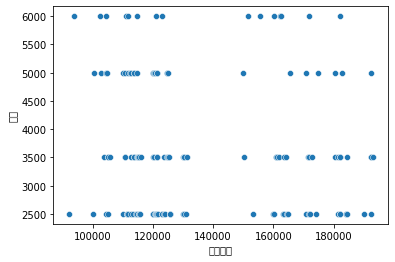

In [ ]:
# 산점도

ax = sns.scatterplot(x="집배시간", y="운임", data=sample)

In [ ]:
# 운임에 대한 정의  https://www.netinbag.com/ko/finance/what-are-freight-charges.html
# => 운임은 한 지리적 위치에서 다른 지리적 위치로 상품을 운송하는데 필요한 비용을 의미함 여기에는 다양한 운송비 외에 포장및 보험 비용이 포함될수 있다. 
# 

In [ ]:
# 집화일자와 배달일자의 차이와 운임비용간의 상관관계

# (df.fr-df.to).astype('timedelta64[h]')

# sample["diff"] = sample["배달일자"]-sample["집화일자"]
sample["diff_h"] = (sample.배달일자 - sample.집화일자).astype('timedelta64[h]')

In [ ]:
sample[:]

,집화일자,배달일자,받는분주소,운임,집화여부,집배시간,수량(BOX),diff_h
29929,2021-03-05,2021-03-06,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,92059,1,24.0
364046,2021-03-05,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,6000,Y,93958,1,72.0
365218,2021-03-07,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,100013,1,24.0
364881,2021-03-04,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,100539,1,96.0
364635,2021-03-05,2021-03-08,경기도 화성시 봉담읍 상봉길 35-10,6000,Y,102500,1,72.0
...,...,...,...,...,...,...,...,...
365138,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,5000,Y,192301,1,24.0
365149,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,3500,Y,192455,1,24.0
364204,2021-03-02,2021-03-03,경기도 화성시 봉담읍 상봉길 35-10,2500,Y,192503,1,24.0
267388,2021-03-03,2021-03-05,경기도 화성시 봉담읍 상봉길 35-10,3500,Y,192548,1,48.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0, flags=flags)


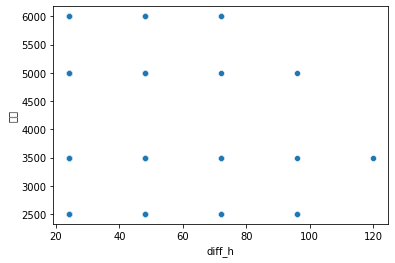

In [ ]:
ax = sns.scatterplot(x="diff_h", y="운임", data=sample)

In [ ]:
sample["운임"].corr(sample["집배시간"], method="kendall")

-0.09568485552333603

In [ ]:
data["수량(BOX)"].unique()

array([1, 2])

In [ ]:
path2 = "/content/drive/MyDrive/CJ 미래기술 첼린지/2021년 미래기술 챌린지/2. 택배 배송 데이터/2-7. 택배 배송 데이터.xlsx"

In [ ]:
data2 = pd.read_excel(path2)

In [ ]:
data2["수량(BOX)"].unique()

array([1, 2])

In [ ]:
data2

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
0,0,배달,2021-04-13,2021-04-14,신용,1,3500,Y,194336,2021-04-14,스마트폰,패션 의류,57,경기도 화성시 장안면 석포로 57 정규빌3동
1,1,배달,2021-04-15,2021-04-16,선불,1,3500,Y,180224,2021-04-16,스마트폰,패션 의류,57,경기도 화성시 장안면 석포리 경기도 화성시 장안면
2,2,배달,2021-04-12,2021-04-13,신용,1,3500,Y,185435,2021-04-13,스마트폰,패션 의류,57,경기도 화성시 장안면 버들로 1201-3
3,3,배달,2021-04-18,2021-04-19,선불,1,3500,Y,123156,2021-04-19,스마트폰,패션 의류,57,경기도 화성시 장안면 석포로74번길 37-3 경기도 화성시 장안면 석포로74번길
4,4,배달,2021-04-14,2021-04-15,선불,1,6000,Y,203218,2021-04-15,스마트폰,패션 의류,57,경기도 화성시 장안면 무봉길 212-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375183,375183,배달,2021-04-16,2021-04-17,신용,1,2500,Y,121020,2021-04-17,스마트폰,생활/건강,170,경기 화성시 봉담읍 상리 25-7
375184,375184,배달,2021-04-13,2021-04-14,신용,1,2500,Y,113650,2021-04-14,스마트폰,패션 의류,170,경기 화성시 봉담읍 샘마을1길
375185,375185,배달,2021-04-15,2021-04-16,신용,1,6000,Y,152517,2021-04-16,스마트폰,패션 의류,170,경기도 화성시 봉담읍 상봉길 35-10 (호수마을 동문굿모닝힐아파트)
375186,375186,배달,2021-04-15,2021-04-16,신용,1,3500,Y,144245,2021-04-16,스마트폰,패션 의류,170,경기 화성시 봉담읍 삼천병마로 1256-5


운임 비용 5000원 이상 : 사람 -> 사람 (택배 예약시 품목, 크기 등 선택)  사이트 참고(지역 별(제주 제외) 비용 상관 x, 품목 금액, 수량, 크기에 따라 금액 책정)
2500~3500 가격은 고객사에서 사람으로 보낼 때의 계약가격 

택배 기사별 한달~하루 택배 물량
택배 기사는 한정된 택배량을 초과하면 금액에 차별화를 주어 수량조절


In [ ]:
data2["SM명"].unique()


array([ 57,  55, 150, 111,  83, 216, 200, 134, 108,   5, 173,  68,  22,
       175,  99, 130, 259, 280,  27, 196,  21,  93, 135,  51, 161, 281,
       199, 158, 100, 246,  37, 269, 241,  85, 116, 247, 140, 181, 279,
        86, 192,  48,  56,  94,  35,  54, 171, 248,  53, 271, 282,  29,
       139, 182, 184, 124, 152,  69, 260,  96, 112, 235, 238,   0,  47,
        42, 141,   1, 128, 217,   2,  81,  44, 137, 251,   6, 273, 189,
       263, 117,  84,  45, 242, 114,  82,  19, 165, 183, 132, 230,  30,
       220, 131, 255,  41, 104, 209, 233,  98, 143,  14, 168, 127, 272,
       136,  31, 257, 101, 159,  66, 203,  58,  90, 204,  92, 258, 151,
       231, 109, 262, 208,  40, 126, 213,  64,  76,  71, 218, 145, 275,
       267, 237, 160,  59, 239, 142,   7, 228, 129,  91, 122,  80, 119,
       154, 190, 234,  49, 102, 219, 229,  12, 191,  43, 147, 146, 205,
       123, 240,  46,   8,  61,  73, 120, 201,  16,  74,  87, 253, 206,
        60, 148, 162, 214, 179,  65,  72,   9, 153,  10,  11,  2

In [ ]:
# data2[data2["SM명"] == 170]["받는분주소"].unique()

In [ ]:
data2 = data2.sort_values(by = ["배달일자"])
data2

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
100236,100236,배달,2021-04-13,2021-04-05,신용,1,6000,Y,105303,2021-04-05,화면,패션 의류,141,경기도 화성시 팔탄면
233692,233692,배달,2021-04-14,2021-04-08,신용,1,2500,Y,94745,2021-04-08,스마트폰,패션 의류,8,경기도 화성시 병점2로 78
295605,295605,배달,2021-04-12,2021-04-12,신용,1,6000,Y,125501,2021-04-12,스마트폰,패션 의류,186,경기 화성시 병점3로 117
268791,268791,배달,2021-04-12,2021-04-12,신용,1,3500,Y,124613,2021-04-12,스마트폰,패션 의류,10,경기도 화성시 동탄지성로 319-19 (기산동) 에스케이뷰파크3차
238079,238079,배달,2021-04-12,2021-04-12,신용,1,2500,Y,114020,2021-04-12,스마트폰,생활/건강,120,"경기도 오산시 박동길 8 (수청동, 삼익수청아파트)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58094,58094,배달,2021-04-13,2021-04-28,신용,1,3500,Y,211016,2021-04-28,화면,패션 의류,86,경기 화성시 기안동 460-97 홍익대학교
304719,304719,배달,2021-04-17,2021-04-28,신용,1,3500,Y,173743,2021-04-28,화면,패션 의류,211,경기도 평택시 서탄면 수월암4길 160 CJ대한통운
203723,203723,배달,2021-04-13,2021-04-29,신용,1,2500,Y,142745,2021-04-29,스마트폰,생활/건강,129,경기도 오산시 운암로 132 (부산동 운암1단지주공아파트)
186730,186730,배달,2021-04-12,2021-04-29,신용,1,5000,Y,201557,2021-04-29,스마트폰,패션 의류,64,"경기도 오산시 대호로 135 (궐동,"


In [ ]:
data2[data2["집배일자"] ==  "2021-04-5"]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
100236,100236,배달,2021-04-13,2021-04-05,신용,1,6000,Y,105303,2021-04-05,화면,패션 의류,141,경기도 화성시 팔탄면


In [ ]:
data2["diff_h"] = (data2.배달일자 - data2.집화일자).astype('timedelta64[h]')

In [ ]:
data2[data2["diff_h"] < 0]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
100236,100236,배달,2021-04-13,2021-04-05,신용,1,6000,Y,105303,2021-04-05,화면,패션 의류,141,경기도 화성시 팔탄면,-192.0
233692,233692,배달,2021-04-14,2021-04-08,신용,1,2500,Y,94745,2021-04-08,스마트폰,패션 의류,8,경기도 화성시 병점2로 78,-144.0
343991,343991,배달,2021-04-15,2021-04-13,신용,1,6000,Y,200548,2021-04-13,스마트폰,패션 의류,33,경기 화성시 마도면 쌍송리,-48.0
192178,192178,배달,2021-04-15,2021-04-14,신용,1,6000,Y,104734,2021-04-14,스마트폰,패션 의류,218,경기도 오산시 오산천로 158 (오산동) 번길15,-24.0
114365,114365,배달,2021-04-16,2021-04-14,신용,1,2500,Y,172756,2021-04-14,스마트폰,생활/건강,6,"경기도 화성시 우정읍 하복골길 50-21,",-48.0
352209,352209,배달,2021-04-16,2021-04-15,신용,1,2500,Y,162058,2021-04-15,스마트폰,생활/건강,95,경기 오산시 궐리사로29번길 13 110동,-24.0
158877,158877,배달,2021-04-16,2021-04-15,신용,1,2500,Y,135420,2021-04-15,스마트폰,생활/건강,272,경기도 화성시 우정읍 조암북로57번길 11-6 (조암 화이트빌) 102동 401호 ...,-24.0
7947,7947,배달,2021-04-17,2021-04-16,신용,1,6000,Y,182648,2021-04-16,스마트폰,패션 의류,83,경기도 오산시 수청로 65-15 (내삼미동) 씨티뷰,-24.0
338560,338560,배달,2021-04-17,2021-04-16,선불,1,5000,Y,125902,2021-04-16,스마트폰,패션 의류,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,-24.0
10341,10341,배달,2021-04-18,2021-04-17,선불,1,6000,Y,162718,2021-04-17,스마트폰,패션 의류,200,"경기도 화성시 융건로 173-22 (배양동,",-24.0


위 11개 데이터는 집화일자가 집배일자보다 뒤임.
반품 상품으로 예상. 집배일자는 상품을 받은 일잘. 집화날짜는 반품상품을 택배기사가 픽업한 날짜.

In [ ]:
data2[data2["받는분주소"] == "경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교"]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
85754,85754,배달,2021-04-12,2021-04-13,신용,1,3500,Y,185746,2021-04-13,스마트폰,패션 의류,69,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
84505,84505,배달,2021-04-12,2021-04-13,선불,1,3500,Y,185746,2021-04-13,스마트폰,패션 의류,69,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
84522,84522,배달,2021-04-12,2021-04-13,신용,1,2500,Y,171933,2021-04-13,스마트폰,생활/건강,69,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
338453,338453,배달,2021-04-12,2021-04-13,신용,1,3500,Y,134505,2021-04-13,스마트폰,패션 의류,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
338529,338529,배달,2021-04-12,2021-04-13,신용,1,2500,Y,134503,2021-04-13,스마트폰,생활/건강,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
338756,338756,배달,2021-04-12,2021-04-13,신용,1,2500,Y,134503,2021-04-13,스마트폰,생활/건강,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
337996,337996,배달,2021-04-12,2021-04-13,선불,1,2500,Y,134504,2021-04-13,스마트폰,생활/건강,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
339743,339743,배달,2021-04-12,2021-04-13,신용,1,5000,Y,134505,2021-04-13,스마트폰,패션 의류,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
339190,339190,배달,2021-04-12,2021-04-13,신용,1,2500,Y,134503,2021-04-13,스마트폰,생활/건강,121,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0
138252,138252,배달,2021-04-12,2021-04-13,신용,1,3500,Y,112658,2021-04-13,스마트폰,패션 의류,230,경기도 오산시 세마문학로 50 (지곶동) e편한세상오산세교,24.0


In [ ]:
# 택배기사의 하루 평균 물량

In [ ]:
dates = data2["배달일자"].unique()
dates

array(['2021-04-05T00:00:00.000000000', '2021-04-08T00:00:00.000000000',
       '2021-04-12T00:00:00.000000000', '2021-04-13T00:00:00.000000000',
       '2021-04-14T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
       '2021-04-16T00:00:00.000000000', '2021-04-17T00:00:00.000000000',
       '2021-04-18T00:00:00.000000000', '2021-04-19T00:00:00.000000000',
       '2021-04-20T00:00:00.000000000', '2021-04-21T00:00:00.000000000',
       '2021-04-22T00:00:00.000000000', '2021-04-23T00:00:00.000000000',
       '2021-04-24T00:00:00.000000000', '2021-04-26T00:00:00.000000000',
       '2021-04-27T00:00:00.000000000', '2021-04-28T00:00:00.000000000',
       '2021-04-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
date_means = {}

for date in dates : 
  t_date = len(data2[data2["배달일자"] == date])
  date_means[date] = t_date

In [ ]:
date_means

{numpy.datetime64('2021-04-05T00:00:00.000000000'): 1,
 numpy.datetime64('2021-04-08T00:00:00.000000000'): 1,
 numpy.datetime64('2021-04-12T00:00:00.000000000'): 46,
 numpy.datetime64('2021-04-13T00:00:00.000000000'): 86670,
 numpy.datetime64('2021-04-14T00:00:00.000000000'): 77087,
 numpy.datetime64('2021-04-15T00:00:00.000000000'): 65794,
 numpy.datetime64('2021-04-16T00:00:00.000000000'): 62723,
 numpy.datetime64('2021-04-17T00:00:00.000000000'): 53889,
 numpy.datetime64('2021-04-18T00:00:00.000000000'): 1,
 numpy.datetime64('2021-04-19T00:00:00.000000000'): 24325,
 numpy.datetime64('2021-04-20T00:00:00.000000000'): 3820,
 numpy.datetime64('2021-04-21T00:00:00.000000000'): 602,
 numpy.datetime64('2021-04-22T00:00:00.000000000'): 119,
 numpy.datetime64('2021-04-23T00:00:00.000000000'): 40,
 numpy.datetime64('2021-04-24T00:00:00.000000000'): 14,
 numpy.datetime64('2021-04-26T00:00:00.000000000'): 29,
 numpy.datetime64('2021-04-27T00:00:00.000000000'): 18,
 numpy.datetime64('2021-04-28

개인택배 - 선불 , 착불
반품 - 선불, 착불, 신용
신용 - 계약 택배

In [ ]:
data2[(data2["운임명"] == "신용") & (data2["운임"] >= 5000)]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
100236,100236,배달,2021-04-13,2021-04-05,신용,1,6000,Y,105303,2021-04-05,화면,패션 의류,141,경기도 화성시 팔탄면,-192.0
295605,295605,배달,2021-04-12,2021-04-12,신용,1,6000,Y,125501,2021-04-12,스마트폰,패션 의류,186,경기 화성시 병점3로 117,0.0
176816,176816,배달,2021-04-12,2021-04-12,신용,1,5000,Y,110159,2021-04-12,스마트폰,패션 의류,92,경기도 오산시 경기대로25번길 16 103-1706,0.0
11557,11557,배달,2021-04-12,2021-04-12,신용,1,6000,Y,112352,2021-04-12,스마트폰,패션 의류,108,"경기도 오산시 수목원로 615 (세교동, 잔다리마을1단지아파트)",0.0
211820,211820,배달,2021-04-12,2021-04-12,신용,1,5000,Y,131914,2021-04-12,스마트폰,패션 의류,190,경기도 화성시 병점동로134번길,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292441,292441,배달,2021-04-16,2021-04-27,신용,1,6000,Y,135435,2021-04-27,화면,패션 의류,106,경기도 화성시 병점1로 65 늘벗마을신창1차아파트,264.0
301267,301267,배달,2021-04-16,2021-04-28,신용,1,5000,Y,174316,2021-04-28,스마트폰,패션 의류,156,"경기도 화성시 향남읍 발안남로 66 (향남읍, 화성발안우림필유아파트)",288.0
103393,103393,배달,2021-04-15,2021-04-28,신용,1,5000,Y,125116,2021-04-28,스마트폰,패션 의류,217,경기 오산시,312.0
97686,97686,배달,2021-04-16,2021-04-28,신용,1,6000,Y,143016,2021-04-28,스마트폰,패션 의류,0,"경기 화성시 봉담읍 와우로15번길 10 (와우리, 봉담그대가3단지아파트)",288.0


In [ ]:
data2[(data2["운임명"] == "신용") & (data2["운임"] < 5000)]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
233692,233692,배달,2021-04-14,2021-04-08,신용,1,2500,Y,94745,2021-04-08,스마트폰,패션 의류,8,경기도 화성시 병점2로 78,-144.0
268791,268791,배달,2021-04-12,2021-04-12,신용,1,3500,Y,124613,2021-04-12,스마트폰,패션 의류,10,경기도 화성시 동탄지성로 319-19 (기산동) 에스케이뷰파크3차,0.0
238079,238079,배달,2021-04-12,2021-04-12,신용,1,2500,Y,114020,2021-04-12,스마트폰,생활/건강,120,"경기도 오산시 박동길 8 (수청동, 삼익수청아파트)",0.0
192603,192603,배달,2021-04-12,2021-04-12,신용,1,3500,Y,183714,2021-04-12,스마트폰,패션 의류,275,경기 화성시 송산면 삼일공원로,0.0
79976,79976,배달,2021-04-12,2021-04-12,신용,1,3500,Y,202229,2021-04-12,스마트폰,패션 의류,184,경기도 화성시 향남읍 손개1길,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315698,315698,배달,2021-04-13,2021-04-28,신용,1,2500,Y,200829,2021-04-28,스마트폰,패션 의류,212,경기도 화성시 장안면 밤밭일원길 122-6,360.0
58094,58094,배달,2021-04-13,2021-04-28,신용,1,3500,Y,211016,2021-04-28,화면,패션 의류,86,경기 화성시 기안동 460-97 홍익대학교,360.0
304719,304719,배달,2021-04-17,2021-04-28,신용,1,3500,Y,173743,2021-04-28,화면,패션 의류,211,경기도 평택시 서탄면 수월암4길 160 CJ대한통운,264.0
203723,203723,배달,2021-04-13,2021-04-29,신용,1,2500,Y,142745,2021-04-29,스마트폰,생활/건강,129,경기도 오산시 운암로 132 (부산동 운암1단지주공아파트),384.0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375188 entries, 100236 to 371620
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  375188 non-null  int64         
 1   구분명         375188 non-null  object        
 2   집화일자        375188 non-null  datetime64[ns]
 3   집배일자        375188 non-null  datetime64[ns]
 4   운임명         375188 non-null  object        
 5   수량(BOX)     375188 non-null  int64         
 6   운임          375188 non-null  int64         
 7   집화여부        375188 non-null  object        
 8   집배시간        375188 non-null  int64         
 9   배달일자        375188 non-null  datetime64[ns]
 10  장비구분        375188 non-null  object        
 11  품목          375188 non-null  object        
 12  SM명         375188 non-null  int64         
 13  받는분주소       375054 non-null  object        
 14  diff_h      375188 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(5), ob

In [ ]:
data2[(data2["운임명"] != "신용")]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
147176,147176,배달,2021-04-12,2021-04-12,선불,1,3500,Y,92716,2021-04-12,스마트폰,패션 의류,209,경기 화성시 서신면 제부로 654번길,0.0
64161,64161,배달,2021-04-12,2021-04-13,선불,1,6000,Y,114948,2021-04-13,스마트폰,패션 의류,35,"경기도 오산시 수청로 220 (금암동,",24.0
259710,259710,배달,2021-04-12,2021-04-13,선불,1,6000,Y,175757,2021-04-13,스마트폰,패션 의류,179,"경기 오산시 시장길 52, 802호 (오산동",24.0
64160,64160,배달,2021-04-12,2021-04-13,선불,1,6000,Y,114948,2021-04-13,스마트폰,패션 의류,35,경기도 오산시 수청로 220 금암마을,24.0
259712,259712,배달,2021-04-12,2021-04-13,선불,1,2500,Y,211638,2021-04-13,스마트폰,패션 의류,179,경기도 오산시 오산동,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105893,105893,배달,2021-04-14,2021-04-26,선불,1,3500,Y,111032,2021-04-26,스마트폰,패션 의류,81,경기도 오산시 오산로178번길 30-1 (원동),288.0
44356,44356,배달,2021-04-14,2021-04-26,선불,1,3500,Y,101932,2021-04-26,스마트폰,패션 의류,246,경기도 오산시 내삼미로48번길 17,288.0
38206,38206,배달,2021-04-16,2021-04-26,착불,1,6000,Y,115745,2021-04-26,스마트폰,패션 의류,281,경기 오산시 외삼미동 31번지 서동탄역더샵파크시티,240.0
292346,292346,배달,2021-04-12,2021-04-27,선불,1,5000,Y,135435,2021-04-27,화면,패션 의류,106,"경기도 화성시 병점1로 65(병점동, 늘벗마을신창1",360.0


In [ ]:
sms = data2["SM명"].unique()

result = {}

for sm in sms : 
  t_sm = len(data2[data2["SM명"] == sm])
  result[sm] = t_sm

In [ ]:
data2[data2["SM명"] == 240]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
230873,230873,배달,2021-04-13,2021-04-14,착불,1,6000,Y,113424,2021-04-14,화면,패션 의류,240,경기도 화성시 정남면,24.0
230870,230870,배달,2021-04-13,2021-04-15,신용,1,3500,Y,124505,2021-04-15,화면,패션 의류,240,경기 화성시 정남면 문학리 대승전자 321동,48.0
230872,230872,배달,2021-04-15,2021-04-16,신용,1,5000,Y,170735,2021-04-16,화면,패션 의류,240,경기도 화성시 정남면,24.0
230874,230874,배달,2021-04-16,2021-04-20,신용,1,3500,Y,94847,2021-04-20,화면,패션 의류,240,경기도 화성시 정남면,96.0
230869,230869,배달,2021-04-17,2021-04-20,신용,1,3500,Y,95201,2021-04-20,화면,패션 의류,240,경기도 양주시 광사동,72.0
230871,230871,배달,2021-04-17,2021-04-22,착불,1,6000,Y,160336,2021-04-22,화면,패션 의류,240,경기 화성시 남양읍 고향의봄길216번길,120.0


In [ ]:
result

In [ ]:
data2[data2["수량(BOX)"] == 2]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
353289,353289,배달,2021-04-15,2021-04-16,선불,2,6000,Y,160239,2021-04-16,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11 (궐동) 제일하이빌아파트,24.0
340716,340716,배달,2021-04-16,2021-04-17,선불,2,6000,Y,132238,2021-04-17,스마트폰,패션 의류,167,경기 오산시 경기대로,24.0


In [ ]:
data2[data2["받는분주소"] == "경기도 오산시 궐리사로29번길 11"]

,Unnamed: 0,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소,diff_h
352401,352401,배달,2021-04-12,2021-04-13,신용,1,3500,Y,175219,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
352657,352657,배달,2021-04-12,2021-04-13,선불,1,5000,Y,175219,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
352681,352681,배달,2021-04-12,2021-04-13,착불,1,6000,Y,193545,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
353578,353578,배달,2021-04-12,2021-04-13,신용,1,3500,Y,120132,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
353086,353086,배달,2021-04-12,2021-04-13,신용,1,5000,Y,175219,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
353031,353031,배달,2021-04-12,2021-04-13,신용,1,6000,Y,210813,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
352889,352889,배달,2021-04-12,2021-04-13,신용,1,2500,Y,210813,2021-04-13,스마트폰,생활/건강,95,경기도 오산시 궐리사로29번길 11,24.0
353509,353509,배달,2021-04-12,2021-04-13,착불,1,6000,Y,193545,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
353462,353462,배달,2021-04-12,2021-04-13,신용,1,5000,Y,111555,2021-04-13,스마트폰,패션 의류,95,경기도 오산시 궐리사로29번길 11,24.0
353302,353302,배달,2021-04-12,2021-04-13,신용,1,2500,Y,193545,2021-04-13,스마트폰,생활/건강,95,경기도 오산시 궐리사로29번길 11,24.0


In [ ]:
import gmaps
import gmaps.datasets
# Use google maps api
gmaps.configure(api_key=api_key) # Fill in with your API key
# Get the dataset
earthquake_df = gmaps.datasets.load_dataset_as_df('earthquakes')
#Get the locations from the data set
locations = earthquake_df[['latitude', 'longitude']]
#Get the magnitude from the data
weights = earthquake_df['magnitude']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

ModuleNotFoundError: ignored